# Patrick M 

In [1]:
#Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

import re
import string


In [2]:

pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# 1a)
There are 7,613 data points on the training set and 3,263 data points on the test set. 
The percentage of disaster tweets is 43% as opposed to 57% are not real disasters.

In [3]:
test = pd.read_csv("testTwitter.csv")
train = pd.read_csv("trainTwitter.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


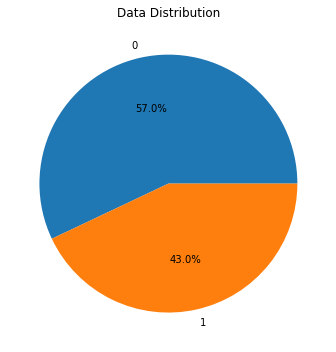

In [4]:
plt.figure(figsize=(5,5))
plt.pie(x=train["target"].value_counts().values,labels=train["target"].value_counts().index,autopct='%1.1f%%')
plt.title("Data Distribution")
plt.tight_layout()

# 1b)

In [5]:
#Splitting Test & Development Set
training_df, development_df = train_test_split(train, test_size=.3, random_state=2)
training_df.head(10)
development_df.head(10)


,id,keyword,location,text,target
3190,4579,emergency%20plan,North Hastings Ontario,Practice your families fire escape plan so eve...,0
6171,8801,sirens,"Nomad, USA",Fuck Sleeping With Sirens.,0
1196,1722,buildings%20burning,NaN,'i'm a Gemini' *children screaming buildings b...,1
680,982,blazing,"Pig Symbol, Alabama",Montgomery come for the blazing hot weather......,1
3358,4808,evacuated,NaN,I got evacuated from the cinema 30 mins throug...,0
6432,9203,suicide%20bombing,NaN,&lt; 25 Dead In Kuwait Mosque Suicide Bombing ...,1
88,130,accident,"Manchester, NH",Accident left lane blocked in #Manchester on R...,1
291,426,apocalypse,San Francisco,@alexandrapullin It is indeed. If the apocalyp...,0
6339,9061,structural%20failure,NaN,Investigators say a fatal Virgin Galactic spac...,1
4557,6478,injured,NaN,#golf McIlroy fuels PGA speculation after vide...,0


# 1c)
In natural language processing we want to tokenize all of the data by splitting the text up into smaller bits. This preprocessing method will help us get rid of any unnecessary text to make the dataset more digestible, and to help our predictive models. Furthermore, we will lemmatize the datasets and group together any tweets that have different forms of the same word. This will clean our data and allow us to get the base word, so less variance is present within the dataset. Because we are working with a dataset of tweets, we have to remove hashtag, retweet, and URL symbols in the training & development datasets because the symbols are irrelevant to our predictive model. Lastly, we converted all uppercase letters to lowercase, in the effort to make it easier to parse the data. 

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patrickmazza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/patrickmazza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#Remove hashtags, retweets and URL's symbols. 
def remove_marks(sentence):
    sentence_r = re.sub(r'^RT[\s]+', '', sentence)
    sentence_r = re.sub(r'https?://[^\s\n\r]+', '', sentence_r)
    sentence_r = re.sub(r'#', '', sentence_r)
    
    return sentence_r
training_df['text'] = training_df['text'].apply(lambda x: remove_marks(x))
print(training_df['text'][:5])
development_df['text'] = development_df['text'].apply(lambda x: remove_marks(x))
print(development_df['text'][:5])

2466    Latest : Trains derailment: 'It's the freakies...
3670                                             fatality
6836    @BoyInAHorsemask its a panda trapped in a dogs...
524     PATRICK ROY 1998-99 UPPER DECK SPX 171 FINITE ...
3640    Estimated damage and fatalities of an Hiroshim...
Name: text, dtype: object
3190    Practice your families fire escape plan so eve...
6171                           Fuck Sleeping With Sirens.
1196    'i'm a Gemini' *children screaming buildings b...
680     Montgomery come for the blazing hot weather......
3358    I got evacuated from the cinema 30 mins throug...
Name: text, dtype: object


In [8]:
#Remove StopWords and punctuations. 
STOPWORDS = stopwords.words('english')
def remove_stop_words(sentence_tokenized): 
    no_stop_words = []
    for word in sentence_tokenized:
        if ((word not in STOPWORDS) and (word not in string.punctuation)): 
            no_stop_words.append(word)
    return no_stop_words

print(training_df['text'][:5])
training_df['text'] = training_df['text'].apply(lambda x: ' '.join(remove_stop_words(word_tokenize(x))))
print(development_df['text'][:5])
development_df['text'] = development_df['text'].apply(lambda x: ' '.join(remove_stop_words(word_tokenize(x))))

2466    Latest : Trains derailment: 'It's the freakies...
3670                                             fatality
6836    @BoyInAHorsemask its a panda trapped in a dogs...
524     PATRICK ROY 1998-99 UPPER DECK SPX 171 FINITE ...
3640    Estimated damage and fatalities of an Hiroshim...
Name: text, dtype: object
3190    Practice your families fire escape plan so eve...
6171                           Fuck Sleeping With Sirens.
1196    'i'm a Gemini' *children screaming buildings b...
680     Montgomery come for the blazing hot weather......
3358    I got evacuated from the cinema 30 mins throug...
Name: text, dtype: object


In [9]:
training_df['text']
development_df['text']

3190    Practice families fire escape plan everyone kn...
6171                            Fuck Sleeping With Sirens
1196    'm Gemini children screaming buildings burning...
680     Montgomery come blazing hot weather ... stay S...
3358    I got evacuated cinema 30 mins Inside Out Kill...
                              ...                        
6762    Brunette beauty Night A stretches victorian so...
720     Apparently 're bleeding people look weird lol ...
3936    Spot Flood Combo 53inch 300W Curved Cree LED W...
4727    I liked YouTube video skippy6gaming Minecraft ...
5852    Four Things That May Ruin Your Personal Injury...
Name: text, Length: 2284, dtype: object

In [10]:
training_df['text'] = training_df['text'].str.lower()
print(training_df['text'][:5])
development_df['text'] = development_df['text'].str.lower()
print(development_df['text'][:5])

2466    latest trains derailment 'it 's freakiest frea...
3670                                             fatality
6836              boyinahorsemask panda trapped dogs body
524     patrick roy 1998-99 upper deck spx 171 finite ...
3640    estimated damage fatalities hiroshima-sized at...
Name: text, dtype: object
3190    practice families fire escape plan everyone kn...
6171                            fuck sleeping with sirens
1196    'm gemini children screaming buildings burning...
680     montgomery come blazing hot weather ... stay s...
3358    i got evacuated cinema 30 mins inside out kill...
Name: text, dtype: object


In [11]:
def lemmatize(sentence):
    ps =  PorterStemmer()
    tokenized_words = word_tokenize(sentence)
    word_list = []
    for word in tokenized_words:
        word_list.append(ps.stem(word))
    return word_list
training_df['text'] =  training_df['text'].apply(lambda sentence: ' '.join(lemmatize(sentence)))
development_df['text'] =  development_df['text'].apply(lambda sentence: ' '.join(lemmatize(sentence)))

In [12]:
training_df['text'].tolist()
development_df['text'].tolist()

['practic famili fire escap plan everyon know case emerg',
 'fuck sleep with siren',
 "'m gemini children scream build burn polic siren distanc",
 'montgomeri come blaze hot weather ... stay std yet anoth reject citi slogan',
 'i got evacu cinema 30 min insid out kill pleas',
 'lt 25 dead in kuwait mosqu suicid bomb claim by isi offshoot',
 'accid left lane block manchest rt 293 nb eddi rd stop go traffic back nh-3a delay 4 min traffic',
 "alexandrapullin it inde if apocalyps come week i know i 'll",
 'investig say fatal virgin galact spaceship crash last year caus structur failur co\x89û_',
 'golf mcilroy fuel pga specul video injur world number one rori mcilroy fuel speculatio ... news',
 'angri woman openli accus nema of steal relief materi meant for idp an angri intern displac wom ...',
 "lovelylikelaura i see one favorit book 'beauti disast may one mine",
 'squeaver hangin star buck watchin boy wreck septic tank',
 'mortal kombat x all fatal on meat predat',
 'nc senat follow hous

# 1d)
The appropriate M threshold that we decided on was 20 because we wanted to build a vocabulary that had enough data for the predictive model to benefit from without being too concise and having too few words. 15 and 25 were also tested in place of 20. This resulted in either overfitting or underfitting the model.

In [33]:
vectorizer = CountVectorizer(binary=True, min_df=20)

X = vectorizer.fit_transform(training_df['text'].tolist())
vectorizer.get_feature_names_out()

X_test = vectorizer.transform(development_df['text'].tolist())
vectorizer.get_feature_names_out()


vectorizer2 = CountVectorizer(binary=True, min_df=20, analyzer='word')
X2 = vectorizer2.fit_transform(training_df['text'].tolist())
print(X2.toarray())

X2_test = vectorizer.transform(development_df['text'].tolist())
vectorizer.get_feature_names_out()
print(X_test.toarray())
print(len(vectorizer.get_feature_names_out()))
y = np.array(training_df['target'])
y_dev = np.array(development_df['target'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
576


In [14]:
training_df['text']

2466    latest train derail 'it 's freakiest freak acc...
3670                                                fatal
6836                  boyinahorsemask panda trap dog bodi
524     patrick roy 1998-99 upper deck spx 171 finit 1...
3640    estim damag fatal hiroshima-s atom bomb drop h...
                              ...                        
3606    boy 11 charg manslaught shoot death elijah walker
5704    photo hundr rescu migrant await disembark iris...
6637                me pull fight hoe call zayn terrorist
2575    sapphirescallop destroy oppa imag oop there 's...
7336    idfir parker ridg fact sheet aug 6 2015 parker...
Name: text, Length: 5329, dtype: object

# 1e)
    i. When implementing the logistic regression model without regularization, we first had an issue with overfitting. At first, the predictive model for the train set was outputting 98%- clearly overfitting. To resolve this, we adjusted the M threshold in the bag of words, which made the train set fit properly, resulting in 80% for train and 70.6% for dev.   
    ii. For the logistic regression model with L1 regularization, both models fit well with the training set at 
    78.8% and the development set at 71.2%.
    iii. Similarly to i., we first had an issue with overfitting. At first, the predictive model for the train 
    set was outputting 98% which was overfitting. To resolve this, we adjusted the M threshold in the bag of words,
    which made the train set fit properly, resulting in 79% for train and 71.5% for dev. 
    iv. The best predictive model was the third one which was the L2 regularization. As explained in bullet iii., we 
    adjusted the M threshold in the bag of words, which made the train set fit.
    v. The most prominent words were make, close, emerg, wreck, end, hazard, forc, up, and blood. 

In [15]:

def simple_logistic_classify(X_tr, y_tr, X_test, y_test, penalty, solver):
    model = LogisticRegression(penalty=penalty, solver=solver).fit(X_tr, y_tr)
    predicted_y_tr = model.predict(X_tr)
    score = f1_score(predicted_y_tr, y_tr)
    print('Score for Train:', score)
    predicted_y_test = model.predict(X_test)
    score = f1_score(predicted_y_test, y_test)
    print('Score for Dev:', score)
    return model


In [16]:
simple_logistic_classify(X.toarray(), y, X_test, y_dev, penalty='none', solver='lbfgs')
simple_logistic_classify(X.toarray(), y, X_test, y_dev, penalty='l1', solver='liblinear')
model = simple_logistic_classify(X.toarray(), y, X_test, y_dev, penalty='l2', solver='lbfgs')

model.coef_

Score for Train: 0.8007346189164372
Score for Dev: 0.706574024585783
Score for Train: 0.7886140923938405
Score for Dev: 0.7129579004920721
Score for Train: 0.79182156133829
Score for Dev: 0.7158351409978307


/Users/patrickmazza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.83642336, -0.05110648,  0.33909526, -0.04857385,  0.25765055,
         0.02465068,  0.1992532 , -0.14814658,  0.90790808,  0.39468802,
         1.26246157,  0.11093686,  0.79274645,  0.21550176, -0.70213711,
         0.38804648,  1.08811316, -0.48763367,  0.54595296,  0.41738932,
         0.73879133,  1.07938306, -0.50306268, -0.12235568, -0.80093143,
        -0.25393454,  0.70897198,  0.57279544, -0.47395089,  1.26431192,
        -0.0238489 ,  0.45847652, -0.22281775,  0.47637031,  0.64310362,
        -0.05614634, -0.67626935,  0.52770683, -0.45381218,  0.56268067,
        -0.10774091,  0.7043804 ,  1.29109079, -0.82726101,  0.36648089,
         1.3605322 ,  1.1573968 , -0.82674034, -0.18610331, -0.13764294,
        -0.08220909,  0.17379186, -0.02811415, -1.11548765,  0.30636352,
        -0.45972102,  0.474504  ,  0.01399884, -0.49777389,  0.081908  ,
        -0.70024232, -1.35702261,  0.0984633 ,  1.45241452, -0.62680863,
         0.44546588, -0.82809498, -0.29922878, -1.3

In [17]:
model = LogisticRegression(penalty='none').fit(X, y)
predicted_y_tr = model.predict(X)

/Users/patrickmazza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
bag =model.coef_[0]
words = np.argpartition(bag, -10)[-10:]
for w in words:
    print(list(vectorizer.vocabulary_.items())[w])

('mh370', 312)
('person', 367)
('major', 297)
('flatten', 182)
('collaps', 107)
('watch', 532)
('after', 16)
('catastroph', 98)
('st', 453)
('california', 91)


# 1f) NB

In [19]:
X_train_N = X.toarray()
X_dev_N = X_test.toarray()

In [20]:
# we can implement these formulas over the Iris dataset
n = X_train_N.shape[0] # size of the dataset
d = X_train_N.shape[1] # number of features in our dataset
K = 2 

# these are the shapes of the parameters
psis = np.zeros([K,d])
phis = np.zeros([K])


# we now compute the parameters
for k in range(K):
    X_train_N_k = X_train_N[y == k]
    psis[k] = np.mean(X_train_N_k, axis=0)
    phis[k] = X_train_N_k.shape[0] / float(n)

# print out the class proportions
print(phis)

[0.56933759 0.43066241]


In [21]:
# we can implement this in numpy
def nb_predictions(x, psis, phis):
    """This returns class assignments and scores under the NB model.
    
    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n, d = x.shape
    
    x = np.reshape(x, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))
    
    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)
    
    # compute log-probabilities
    logpy = np.log(phis).reshape([K,1])
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])
# print(X_test.shape)
# print(psis.shape)
# print(phis.shape)

idx, logpyx = nb_predictions(X_dev_N, psis, phis)
print(idx[:10])

[1 0 0 0 1 1 0 0 1 1]


In [22]:
(idx==y_dev).mean()

0.7714535901926445

# 1g)
The generative model, Naive Bayes, performed the best in predicting whether a tweet is of a real disaster or not. The logistic regression model, which is discriminative, resulted in 71%, while the naive bayes resulted in 77%. The pros of using discriminative models is that they are more robust against outliers but the one major drawback is the misclassification problem of wrongly classifying a data point. Whereas, discriminative models have the advantage of being more robust to outliers while also not assuming anything related to the independence of features. 

Naive bayes assumes that there is no correlation between the presence of multiple features. Yes, it is efficient to use Bernoulli Naive Bayes classifier for natural language texts because it is a probabilistic algorithm that predicts the tags of texts.


# 1h)
1.
    The total number of 1-grams and 2-grams is 620. 
    The appropriate M threshold that we decided on was 20 because we wanted to build a vocabulary that had enough data for the predictive model to benefit from without being too concise and having too few words. 15 and 25 were also tested in place of 20. This resulted in either overfitting or underfitting the model.
    10 2 grams: tragedi mp, transport bioterror, trench releas, turkey armi, two giant, typhoon devast, typhoon soudelor, unconfirm heard, under minut, via youtub
    
2.
    Reported results for on the ngram model for logistic regression:
    no parameters: train= 80.4%, dev= 70.8%
    L1: train= 78.9%, dev= 71.2%
    L2: train= 79.3%, dev= 71.8%
    N-gram naive bayes predictive model: 77.2%
    
These results are not very different from the bag of words model. This infers that using more words does not give any additional, quality data to the predictive model

In [44]:
vectorizer = CountVectorizer(binary=True, min_df=20, analyzer='word', ngram_range=(1, 2))

X = vectorizer.fit_transform(training_df['text'].tolist())
vectorizer.get_feature_names_out()

X_test = vectorizer.transform(development_df['text'].tolist())
vectorizer.get_feature_names_out()


vectorizer2 = CountVectorizer(binary=True, min_df=20, analyzer='word', ngram_range=(1, 2))
X2 = vectorizer2.fit_transform(training_df['text'].tolist())
print(X2.toarray())
#print(vectorizer.get_feature_names_out()[1200:1300])

X2_test = vectorizer.transform(development_df['text'].tolist())
vectorizer.get_feature_names_out()
print(X_test.toarray())

y = np.array(training_df['target'])
y_dev = np.array(development_df['target'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:

def simple_logistic_classify(X_tr, y_tr, X_test, y_test, penalty, solver):
    model = LogisticRegression(penalty=penalty, solver=solver).fit(X_tr, y_tr)
    predicted_y_tr = model.predict(X_tr)
    score = f1_score(predicted_y_tr, y_tr)
    print('Score for Train:', score)
    predicted_y_test = model.predict(X_test)
    score = f1_score(predicted_y_test, y_test)
    print('Score for Dev:', score)
    return model


In [25]:
model = LogisticRegression(penalty='none').fit(X, y)
predicted_y_tr = model.predict(X)

/Users/patrickmazza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
simple_logistic_classify(X.toarray(), y, X_test, y_dev, penalty='none', solver='lbfgs')
simple_logistic_classify(X.toarray(), y, X_test, y_dev, penalty='l1', solver='liblinear')
model = simple_logistic_classify(X.toarray(), y, X_test, y_dev, penalty='l2', solver='lbfgs')

model.coef_

/Users/patrickmazza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score for Train: 0.8042182485098579
Score for Dev: 0.7080878414568827
Score for Train: 0.7898923724847917
Score for Dev: 0.7126436781609197
Score for Train: 0.7930232558139535
Score for Dev: 0.718004338394794


array([[ 8.32681261e-01, -4.08115414e-02,  3.42057461e-01,
        -2.79207860e-02,  1.30809038e-01,  1.30809038e-01,
         1.09642599e-02,  1.94138422e-01, -1.53103125e-01,
         8.36142170e-01,  1.97067491e-01,  3.85513644e-01,
         1.04392155e+00,  7.50904354e-01,  1.18785387e-01,
         7.82943213e-01,  2.29371964e-01, -5.82933656e-01,
         3.01605010e-01,  1.97067491e-01,  1.09796839e+00,
        -4.80084587e-01,  6.04752090e-01,  3.81794830e-01,
         7.51660567e-01,  1.10666448e+00, -4.89099755e-01,
        -1.63597001e-01, -7.94535298e-01, -3.03063729e-01,
         7.02318445e-01,  5.84660950e-01, -4.62682215e-01,
         1.29183207e+00, -1.49754490e-02,  4.41526248e-01,
        -2.42745109e-01,  5.03589335e-01,  6.20229353e-01,
        -3.51421470e-02, -6.99805865e-01,  5.21067659e-01,
        -4.57102532e-01,  5.60105181e-01, -1.00000209e-01,
         6.90380048e-01,  1.27073008e+00, -8.57859008e-01,
         3.57344375e-01,  1.21689029e+00,  6.03684058e-0

In [27]:
X_train_N = X.toarray()
X_dev_N = X_test.toarray()

In [28]:
# we can implement these formulas over the Iris dataset
n = X_train_N.shape[0] # size of the dataset
d = X_train_N.shape[1] # number of features in our dataset
K = 2 

# these are the shapes of the parameters
psis = np.zeros([K,d])
phis = np.zeros([K])


# we now compute the parameters
for k in range(K):
    X_train_N_k = X_train_N[y == k]
    psis[k] = np.mean(X_train_N_k, axis=0)
    phis[k] = X_train_N_k.shape[0] / float(n)

# print out the class proportions
print(phis)

[0.56933759 0.43066241]


In [29]:
# we can implement this in numpy
def nb_predictions(x, psis, phis):
    """This returns class assignments and scores under the NB model.
    
    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n, d = x.shape
    
    x = np.reshape(x, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))
    
    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)
    
    # compute log-probabilities
    logpy = np.log(phis).reshape([K,1])
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])
# print(X_test.shape)
# print(psis.shape)
# print(phis.shape)

idx, logpyx = nb_predictions(X_dev_N, psis, phis)
print(idx[:10])

[1 0 0 0 1 1 0 0 1 1]


In [30]:
(idx==y_dev).mean()

0.7723292469352014

# 1i)
Our Kaggle score was 70.2%. This is a little lower than what we expected because the predictive model we got was 7% higher for the NB model. 

In [31]:
#NB 
test['text'] = test['text'].apply(lambda x: remove_marks(x))

test['text'] = test['text'].apply(lambda x: ' '.join(remove_stop_words(word_tokenize(x))))

test['text'] = test['text'].str.lower()

test['text'] =  test['text'].apply(lambda sentence: ' '.join(lemmatize(sentence)))



X = vectorizer.fit_transform(train['text'].tolist())

X_test = vectorizer.transform(test['text'].tolist())

X_convert = X.toarray()
X_test_convert = X_test.toarray()

# we can implement these formulas over the Iris dataset
n = X_convert.shape[0] # size of the dataset
d = X_convert.shape[1] # number of features in our dataset
K = 2 

# these are the shapes of the parameters
psis = np.zeros([K,d])
phis = np.zeros([K])


# we now compute the parameters
for k in range(K):
    X_train_N_k = X_convert[train.target == k]
    psis[k] = np.mean(X_train_N_k, axis=0)
    phis[k] = X_train_N_k.shape[0] / float(n)

# print out the class proportions
print(phis)


idx, logpyx = nb_predictions(X_test_convert, psis, phis)



id_val = test.id
ans = idx

result = {"id":id_val,"target":ans}
final_df = pd.DataFrame(data = result)
final_df.head()
final_df.to_csv('disaster_result_sep28.csv', index = False)

[0.57034021 0.42965979]
